# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
# for Statistics
import scipy.stats

In [18]:
# load dataSet
dataSet = pd.read_csv('kashti.csv')
dataSet

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1. Data Shapa:
- Mean look to dataSet that how many Columns and rows have in this dataSEt

In [19]:

# find shape of dataFram
rows, columns = dataSet.shape
print('The Number of Rows = ', rows)
print('The Number of Columns = ', columns)

The Number of Rows =  891
The Number of Columns =  16


## 2. Check Data Structure of each Column or Series

In [20]:
# find data structure of columns
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


## 3. Missing Values in Columns and whole dataFram

In [23]:
dataSet.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
dataSet.isnull().sum() / dataSet.shape[0] * 100

Unnamed: 0      0.000000
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In this example we will not consider the Column 'deck' is the percentage of missing value is quite high (**77.2**)

## 4. Split Variable or Making new columns if needed

In [30]:
# making new dataFram using pandas library
df1 = pd.DataFrame(np.array([['Lahore, Pakistan', 87, 100], ['Beijing, China', 45, 96], ['Mosko, Russia', 76, 200]]),
columns=['address', 'male', 'female'])
df1.head()

,address,male,female
0,"Lahore, Pakistan",87,100
1,"Beijing, China",45,96
2,"Mosko, Russia",76,200


In [36]:
# if we want to separte address into city and country columns we split like this
df1[['city' , 'country']] = df1['address'].str.split(',', expand = True)
# to see the result
df1.head()

,address,male,female,city,country
0,"Lahore, Pakistan",87,100,Lahore,Pakistan
1,"Beijing, China",45,96,Beijing,China
2,"Mosko, Russia",76,200,Mosko,Russia


## 5. Type Casting:
We can use astype() function from pandas for type casting

In [38]:
# to see the types in first place
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   male     3 non-null      object
 2   female   3 non-null      object
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [49]:
# convert data type into int
df1[['male', 'female']] = df1[['male', 'female']].astype(int)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   male     3 non-null      int32 
 2   female   3 non-null      int32 
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: int32(2), object(3)
memory usage: 224.0+ bytes


In [51]:
# convert data type into string
df1[['male', 'female']] = df1[['male', 'female']].astype('str')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   male     3 non-null      object
 2   female   3 non-null      object
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


## Step 6. Summary Statistics
 - This gives statistics summary of all the data count, mean, std, min, max, percent quantile of the dataFrame for each column as shown below

In [53]:
dataSet.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 7. Value count of a specific columns
 this will let us know, ka kis column ma kitana values hain

In [58]:
df1['male'].value_counts()
# dataSet['age'].value_counts()

87    1
45    1
76    1
Name: male, dtype: int64

## Step 8. Deal with Duplicates

In [62]:
# find duplicates
dataSet[dataSet.embark_town == 'Queenstown']

# this will show all the people in embark_town which belongs from Queenstown

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
825,825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
828,828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
885,885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


## Step 9. Check the normal distribution of data (Data Anomally)

<AxesSubplot:xlabel='age', ylabel='Count'>

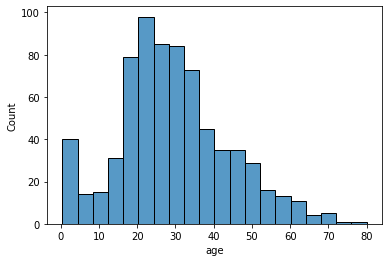

In [63]:
# plot Histogram
sns.histplot(dataSet['age'])

If you want to measure Skewness and Kurtosis of the distribution of the data, as shown below:

In [65]:
# measure Skewness & Kurtosis
dataSet['age'].agg(['skew', 'kurtosis']).transpose()


skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

We see here that age distribution was skewed to the right. Now let's check the outlier for the total column with Boxplot

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

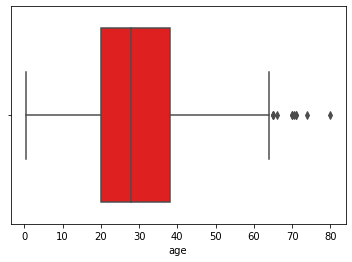

In [66]:
sns.boxplot(dataSet['age'], color= 'red')

## Step 10. Correlation between two variables (Columns / Series)


In [69]:
# draw correlation
cor = dataSet.corr(method='pearson') #You can use spearman if you want
cor
# this will display a coorelation matrix

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,adult_male,alone
Unnamed: 0,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.041010,0.057462
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,0.041010,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,0.057462,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


We can also draw a heatMap of correlation matrix instead of reading number

<AxesSubplot:>

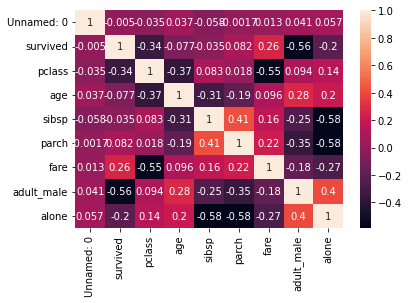

In [71]:
sns.heatmap(cor, annot=True)
# This will show the numbers with colors

We can also draw a pair plot to see the correlation

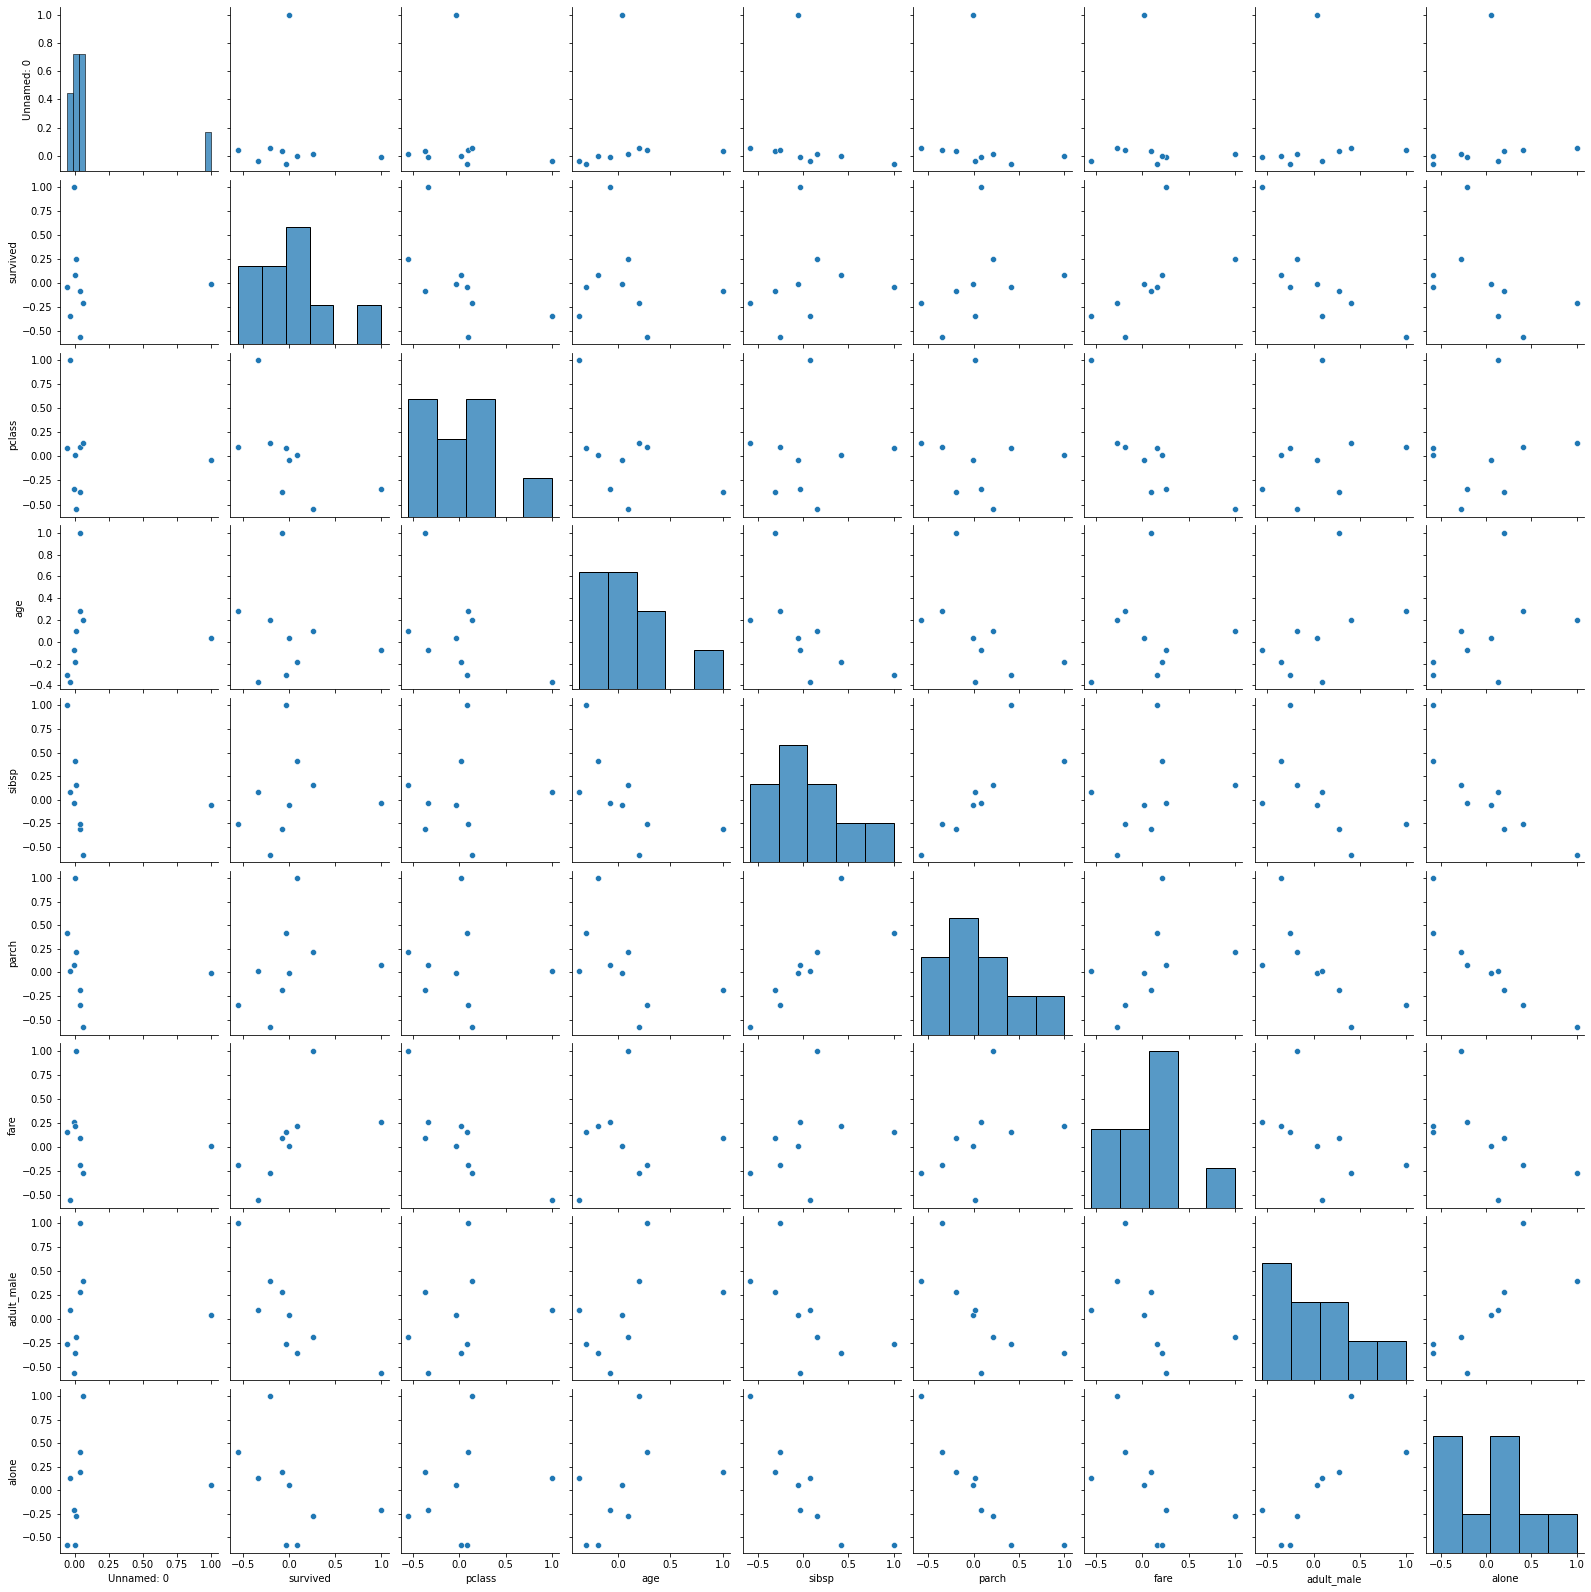

In [72]:
sns.pairplot(cor)